import packages 

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

#### data 1 : generation 

In [1]:
import ctgan
import pandas as pd


In [2]:
df=pd.read_csv(r"D:\PFE_PROJECT\artifacts\data_to_generate.csv")
df.drop(labels="Unnamed: 0",axis=1,inplace=True)
df.head()

,Mother_Eductaion,Binned_Revision_Time,Father_Education,Wants_Higher_Education,Age,Past_Class_Failures,Week_Drugs_Consumption,Abscence,Extra_Activities,Internet_Access,Final_grade,réussir,General_Average
0,4,Medium_time,4,yes,18,0,1,6,no,no,Low,No,5.666667
1,1,Medium_time,1,yes,17,0,1,4,no,yes,Low,No,5.333333
2,1,Medium_time,1,yes,15,3,3,10,no,yes,Low,No,8.333333
3,4,long_time,2,yes,15,0,1,2,yes,yes,High,Yes,14.666667
4,3,Medium_time,3,yes,16,0,2,4,no,no,Low,No,8.666667


In [4]:
df1=df.drop(labels=["General_Average","réussir"],axis=1)

In [18]:
df1.head()

,Mother_Eductaion,Binned_Revision_Time,Father_Education,Wants_Higher_Education,Age,Past_Class_Failures,Week_Drugs_Consumption,Abscence,Extra_Activities,Internet_Access,Final_grade
0,4,Medium_time,4,yes,18,0,1,6,no,no,Low
1,1,Medium_time,1,yes,17,0,1,4,no,yes,Low
2,1,Medium_time,1,yes,15,3,3,10,no,yes,Low
3,4,long_time,2,yes,15,0,1,2,yes,yes,High
4,3,Medium_time,3,yes,16,0,2,4,no,no,Low


In [19]:
categorical_features = ['Mother_Eductaion','Binned_Revision_Time','Father_Education','Wants_Higher_Education','Age','Past_Class_Failures',
       'Week_Drugs_Consumption', 'Abscence', 'Extra_Activities',
       'Internet_Access', 'Final_grade']

#### model training

la creation d'une instance CTGANSyntheisizer et l'entrainement de modele en precisant les donnees et les variables categorielle

In [9]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(df1,categorical_features,epochs=1000)

Gen. (-1.41) | Discrim. (-0.27): 100%|██████████| 1000/1000 [01:46<00:00,  9.40it/s]


synthetic data generation 

In [20]:
samples = ctgan.sample(1000)

In [21]:
samples.head(50)

,Mother_Eductaion,Binned_Revision_Time,Father_Education,Wants_Higher_Education,Age,Past_Class_Failures,Week_Drugs_Consumption,Abscence,Extra_Activities,Internet_Access,Final_grade
0,1,Medium_time,2,yes,16,0,3,4,no,yes,Medium
1,1,short_time,1,yes,19,1,1,3,yes,no,Low
2,3,short_time,4,yes,15,0,3,0,no,yes,Medium
3,1,Medium_time,1,yes,18,0,2,28,no,yes,Low
4,2,long_time,2,yes,17,0,2,0,no,no,Medium
5,4,long_time,4,yes,16,0,1,2,yes,yes,Medium
6,1,short_time,1,yes,18,0,1,10,no,no,Medium
7,4,long_time,4,yes,15,0,2,0,yes,yes,Medium
8,2,Medium_time,2,yes,16,0,4,14,no,no,Medium
9,4,long_time,3,yes,15,0,1,4,yes,no,Medium


In [55]:
#check missing values : 
samples.isna().sum()

Mother_Eductaion          0
Binned_Revision_Time      0
Father_Education          0
Wants_Higher_Education    0
Age                       0
Past_Class_Failures       0
Week_Drugs_Consumption    0
Abscence                  0
Extra_Activities          0
Internet_Access           0
Final_grade               0
dtype: int64

In [56]:
#check duplicates
samples.duplicated().sum()

46

In [57]:
#check types of data : 
samples.dtypes

Mother_Eductaion           int64
Binned_Revision_Time      object
Father_Education           int64
Wants_Higher_Education    object
Age                        int64
Past_Class_Failures        int64
Week_Drugs_Consumption     int64
Abscence                   int64
Extra_Activities          object
Internet_Access           object
Final_grade               object
dtype: object

In [68]:
#numerical features 
numeric_features = [feature for feature in samples.columns if samples[feature].dtype != 'O']
numeric_features

['Mother_Eductaion',
 'Father_Education',
 'Age',
 'Past_Class_Failures',
 'Week_Drugs_Consumption',
 'Abscence']

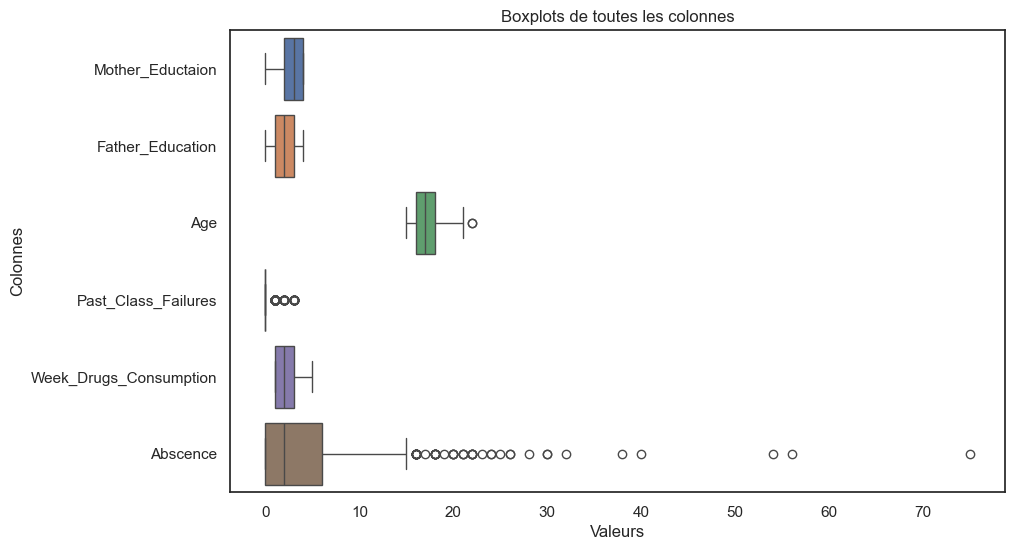

In [69]:
# Tracer les boxplots de toutes les colonnes
plt.figure(figsize=(10, 6))  # Ajuster la taille de la figure si nécessaire
sns.boxplot(data=df[numeric_features], orient="h")  # Tracer les boxplots horizontalement
plt.title("Boxplots de toutes les colonnes")
plt.xlabel("Valeurs")
plt.ylabel("Colonnes")
plt.show()

<Axes: xlabel='Week_Drugs_Consumption'>

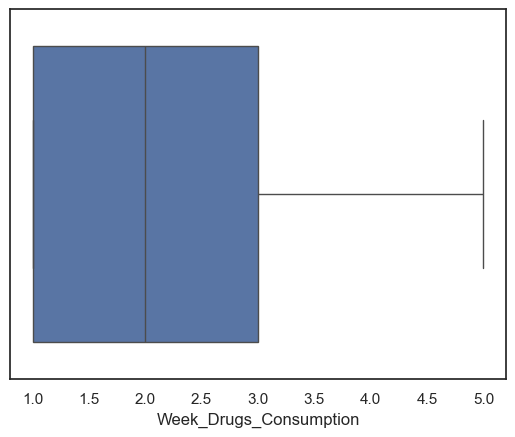

In [79]:
sns.boxplot(x=samples['Week_Drugs_Consumption'])

In [37]:
from table_evaluator import TableEvaluator

class TableEvaluator_cat(TableEvaluator):
    def visual_evaluation(self, save_dir=None, **kwargs):
        """
        Plot visual evaluation metrics without calling plot_mean_std().
        """
        if save_dir is None:
            self.plot_cumsums()
            self.plot_distributions()
            

(1044, 11) (1000, 11)


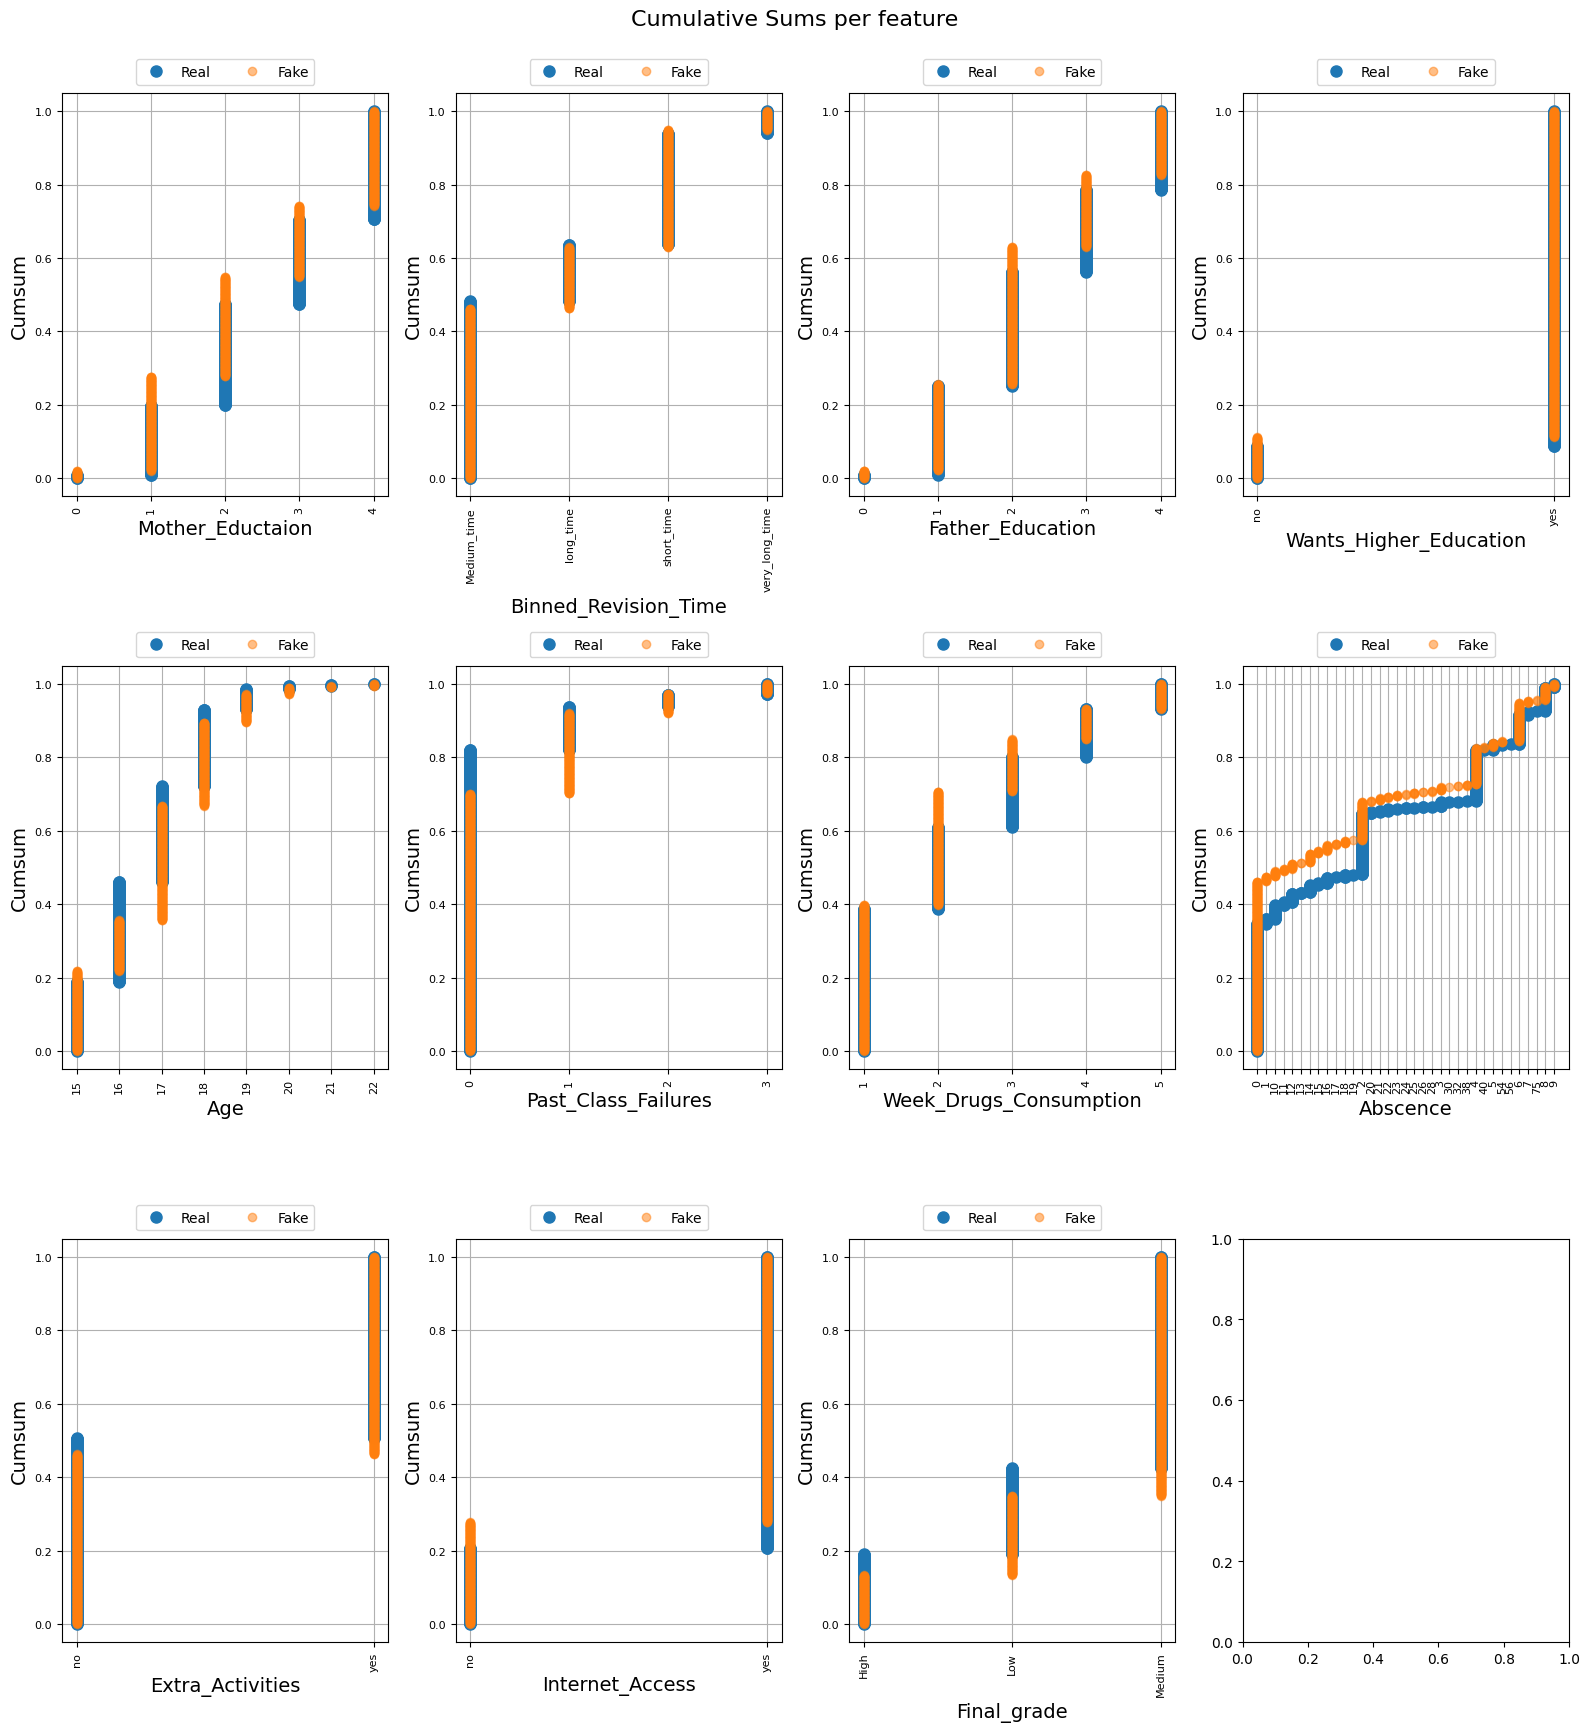

c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\en

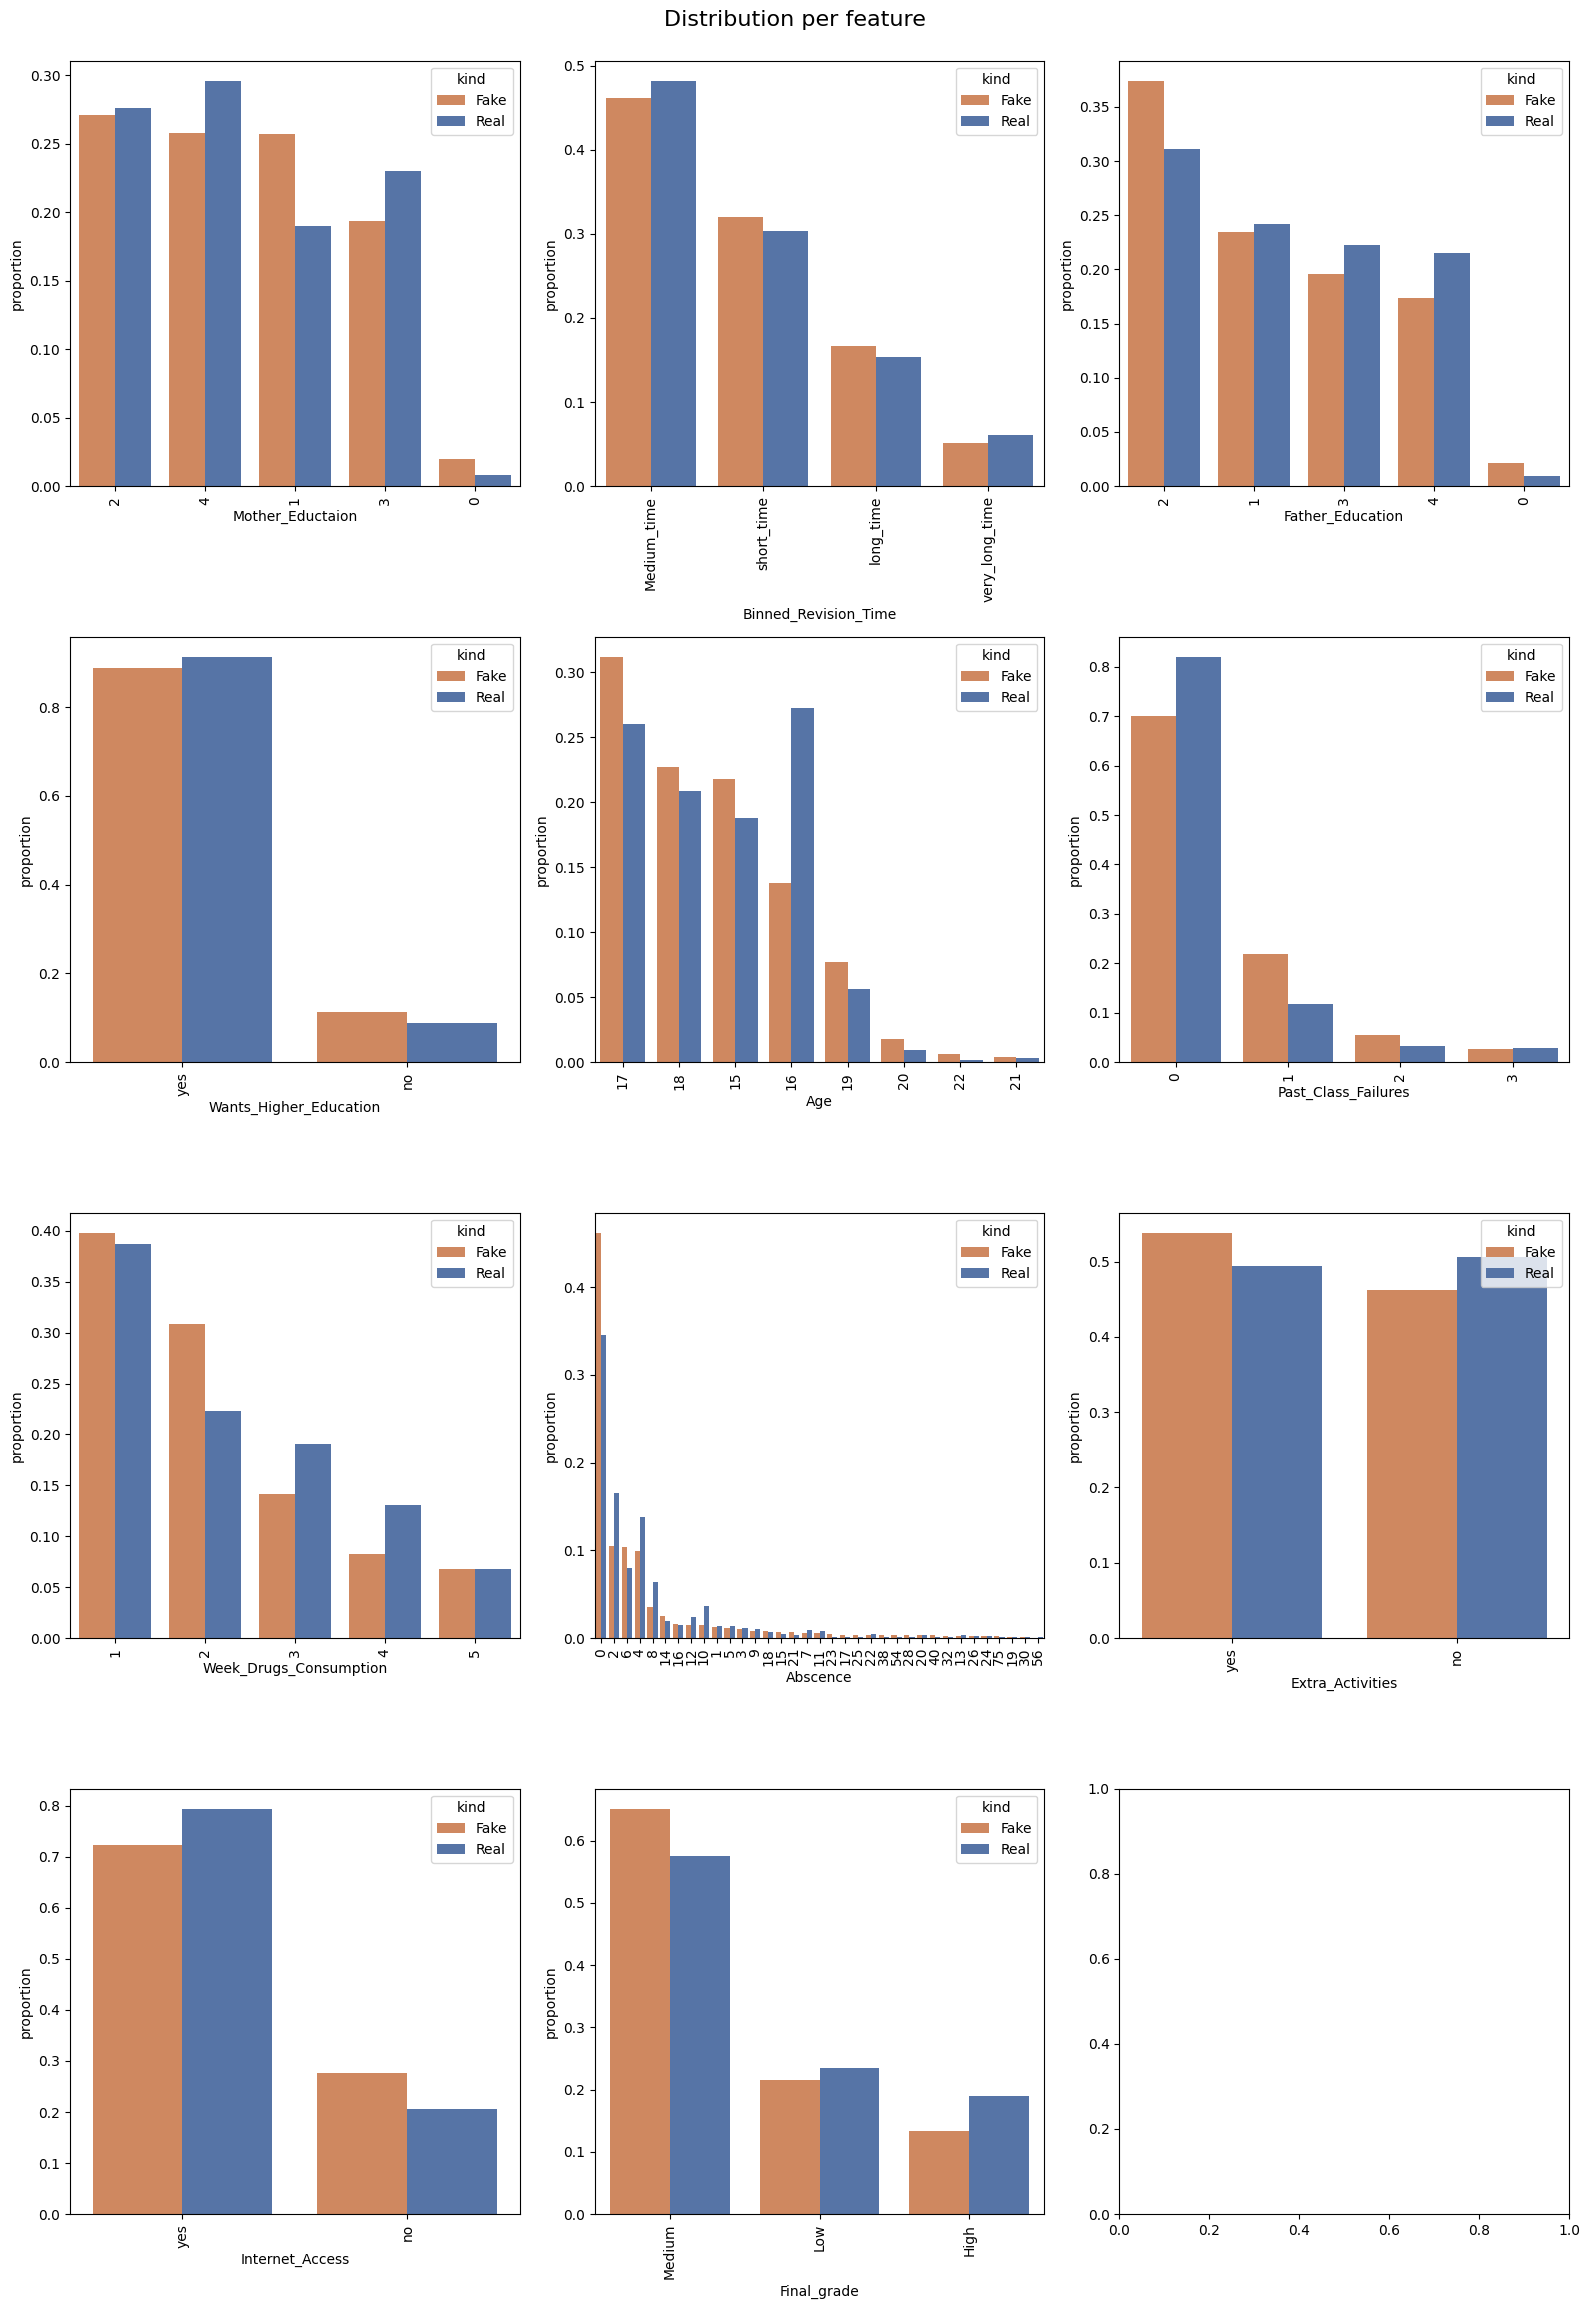

In [38]:

print(df1.shape,samples.shape)
table_evaluator = TableEvaluator_cat(df1,samples,cat_cols=categorical_features)
table_evaluator.visual_evaluation()

#### export data

In [81]:
samples.to_csv(r'D:\PFE_PROJECT\artifacts\data_g_1.csv')

#### generate data 2 : 

In [39]:
df2 = df.drop(labels=["Final_grade","General_Average"],axis=1)
df2.head()

,Mother_Eductaion,Binned_Revision_Time,Father_Education,Wants_Higher_Education,Age,Past_Class_Failures,Week_Drugs_Consumption,Abscence,Extra_Activities,Internet_Access,réussir
0,4,Medium_time,4,yes,18,0,1,6,no,no,No
1,1,Medium_time,1,yes,17,0,1,4,no,yes,No
2,1,Medium_time,1,yes,15,3,3,10,no,yes,No
3,4,long_time,2,yes,15,0,1,2,yes,yes,Yes
4,3,Medium_time,3,yes,16,0,2,4,no,no,No


In [25]:
categorical_features1 = ['Mother_Eductaion','Binned_Revision_Time','Father_Education','Wants_Higher_Education','Age','Past_Class_Failures',
       'Week_Drugs_Consumption', 'Abscence', 'Extra_Activities',
       'Internet_Access','réussir']

In [27]:

ctgan.fit(df2,categorical_features1,epochs=1000)

Gen. (-1.75) | Discrim. (0.14): 100%|██████████| 1000/1000 [03:13<00:00,  5.17it/s]


In [42]:
samples1 = ctgan.sample(1000)
samples1.head(50)

,Mother_Eductaion,Binned_Revision_Time,Father_Education,Wants_Higher_Education,Age,Past_Class_Failures,Week_Drugs_Consumption,Abscence,Extra_Activities,Internet_Access,réussir
0,2,short_time,2,yes,16,0,4,2,yes,yes,Yes
1,2,short_time,2,yes,18,0,1,10,no,yes,Yes
2,2,short_time,3,yes,16,0,1,16,yes,yes,Yes
3,1,short_time,1,yes,18,0,4,0,no,no,No
4,2,short_time,4,yes,16,0,1,7,yes,yes,Yes
5,3,short_time,4,yes,16,0,1,2,yes,yes,Yes
6,3,short_time,3,no,19,1,2,6,no,yes,No
7,2,short_time,3,yes,18,0,1,0,no,yes,Yes
8,2,Medium_time,2,yes,15,0,1,0,no,yes,Yes
9,1,short_time,1,no,16,1,3,18,yes,yes,No


(1044, 11) (1000, 11)


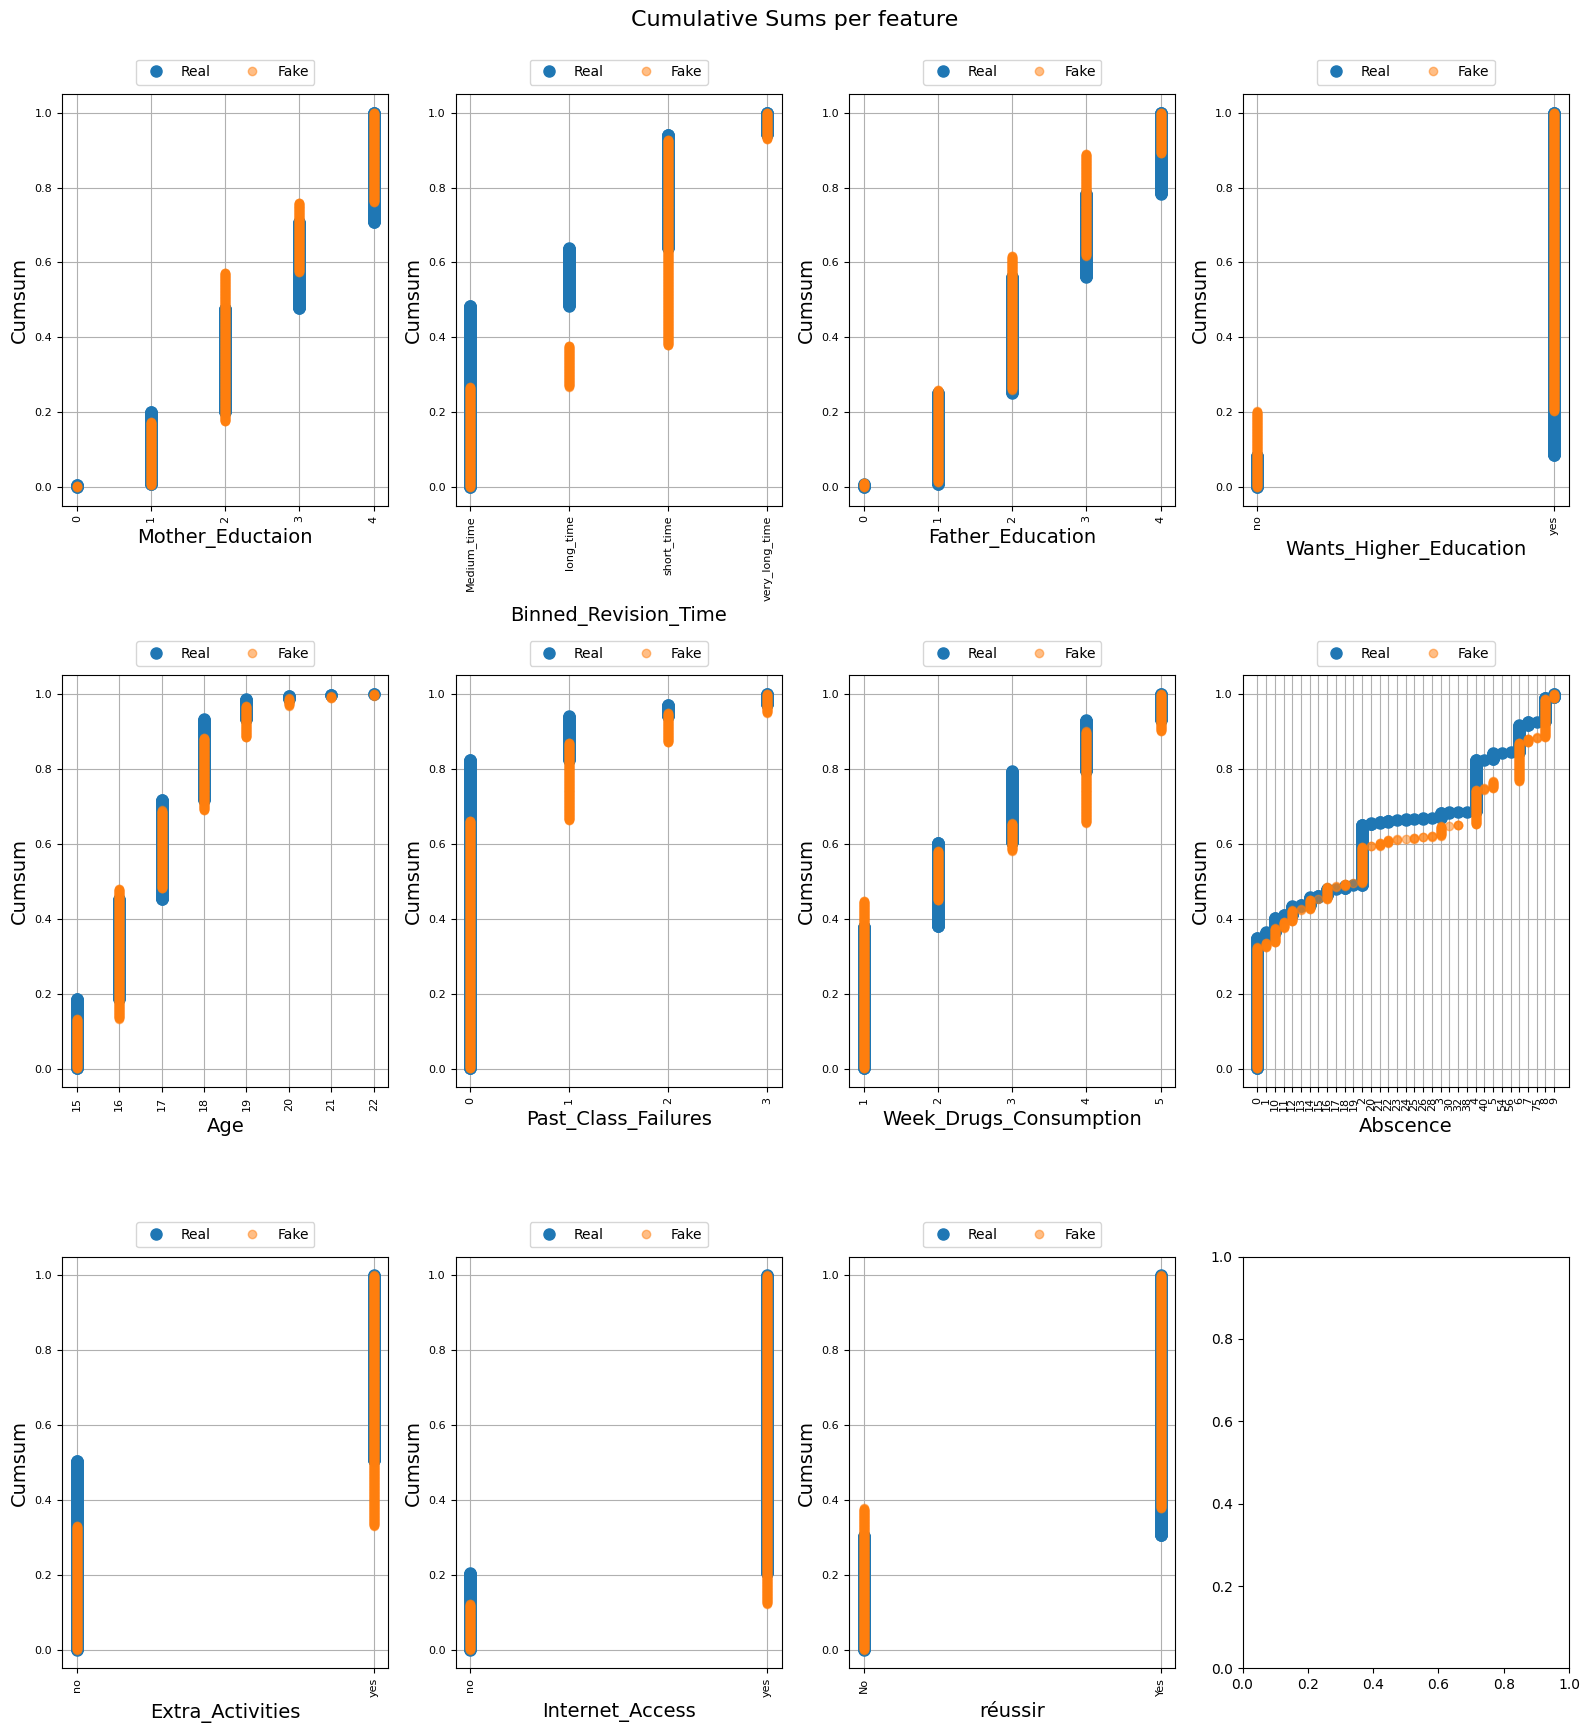

c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\en

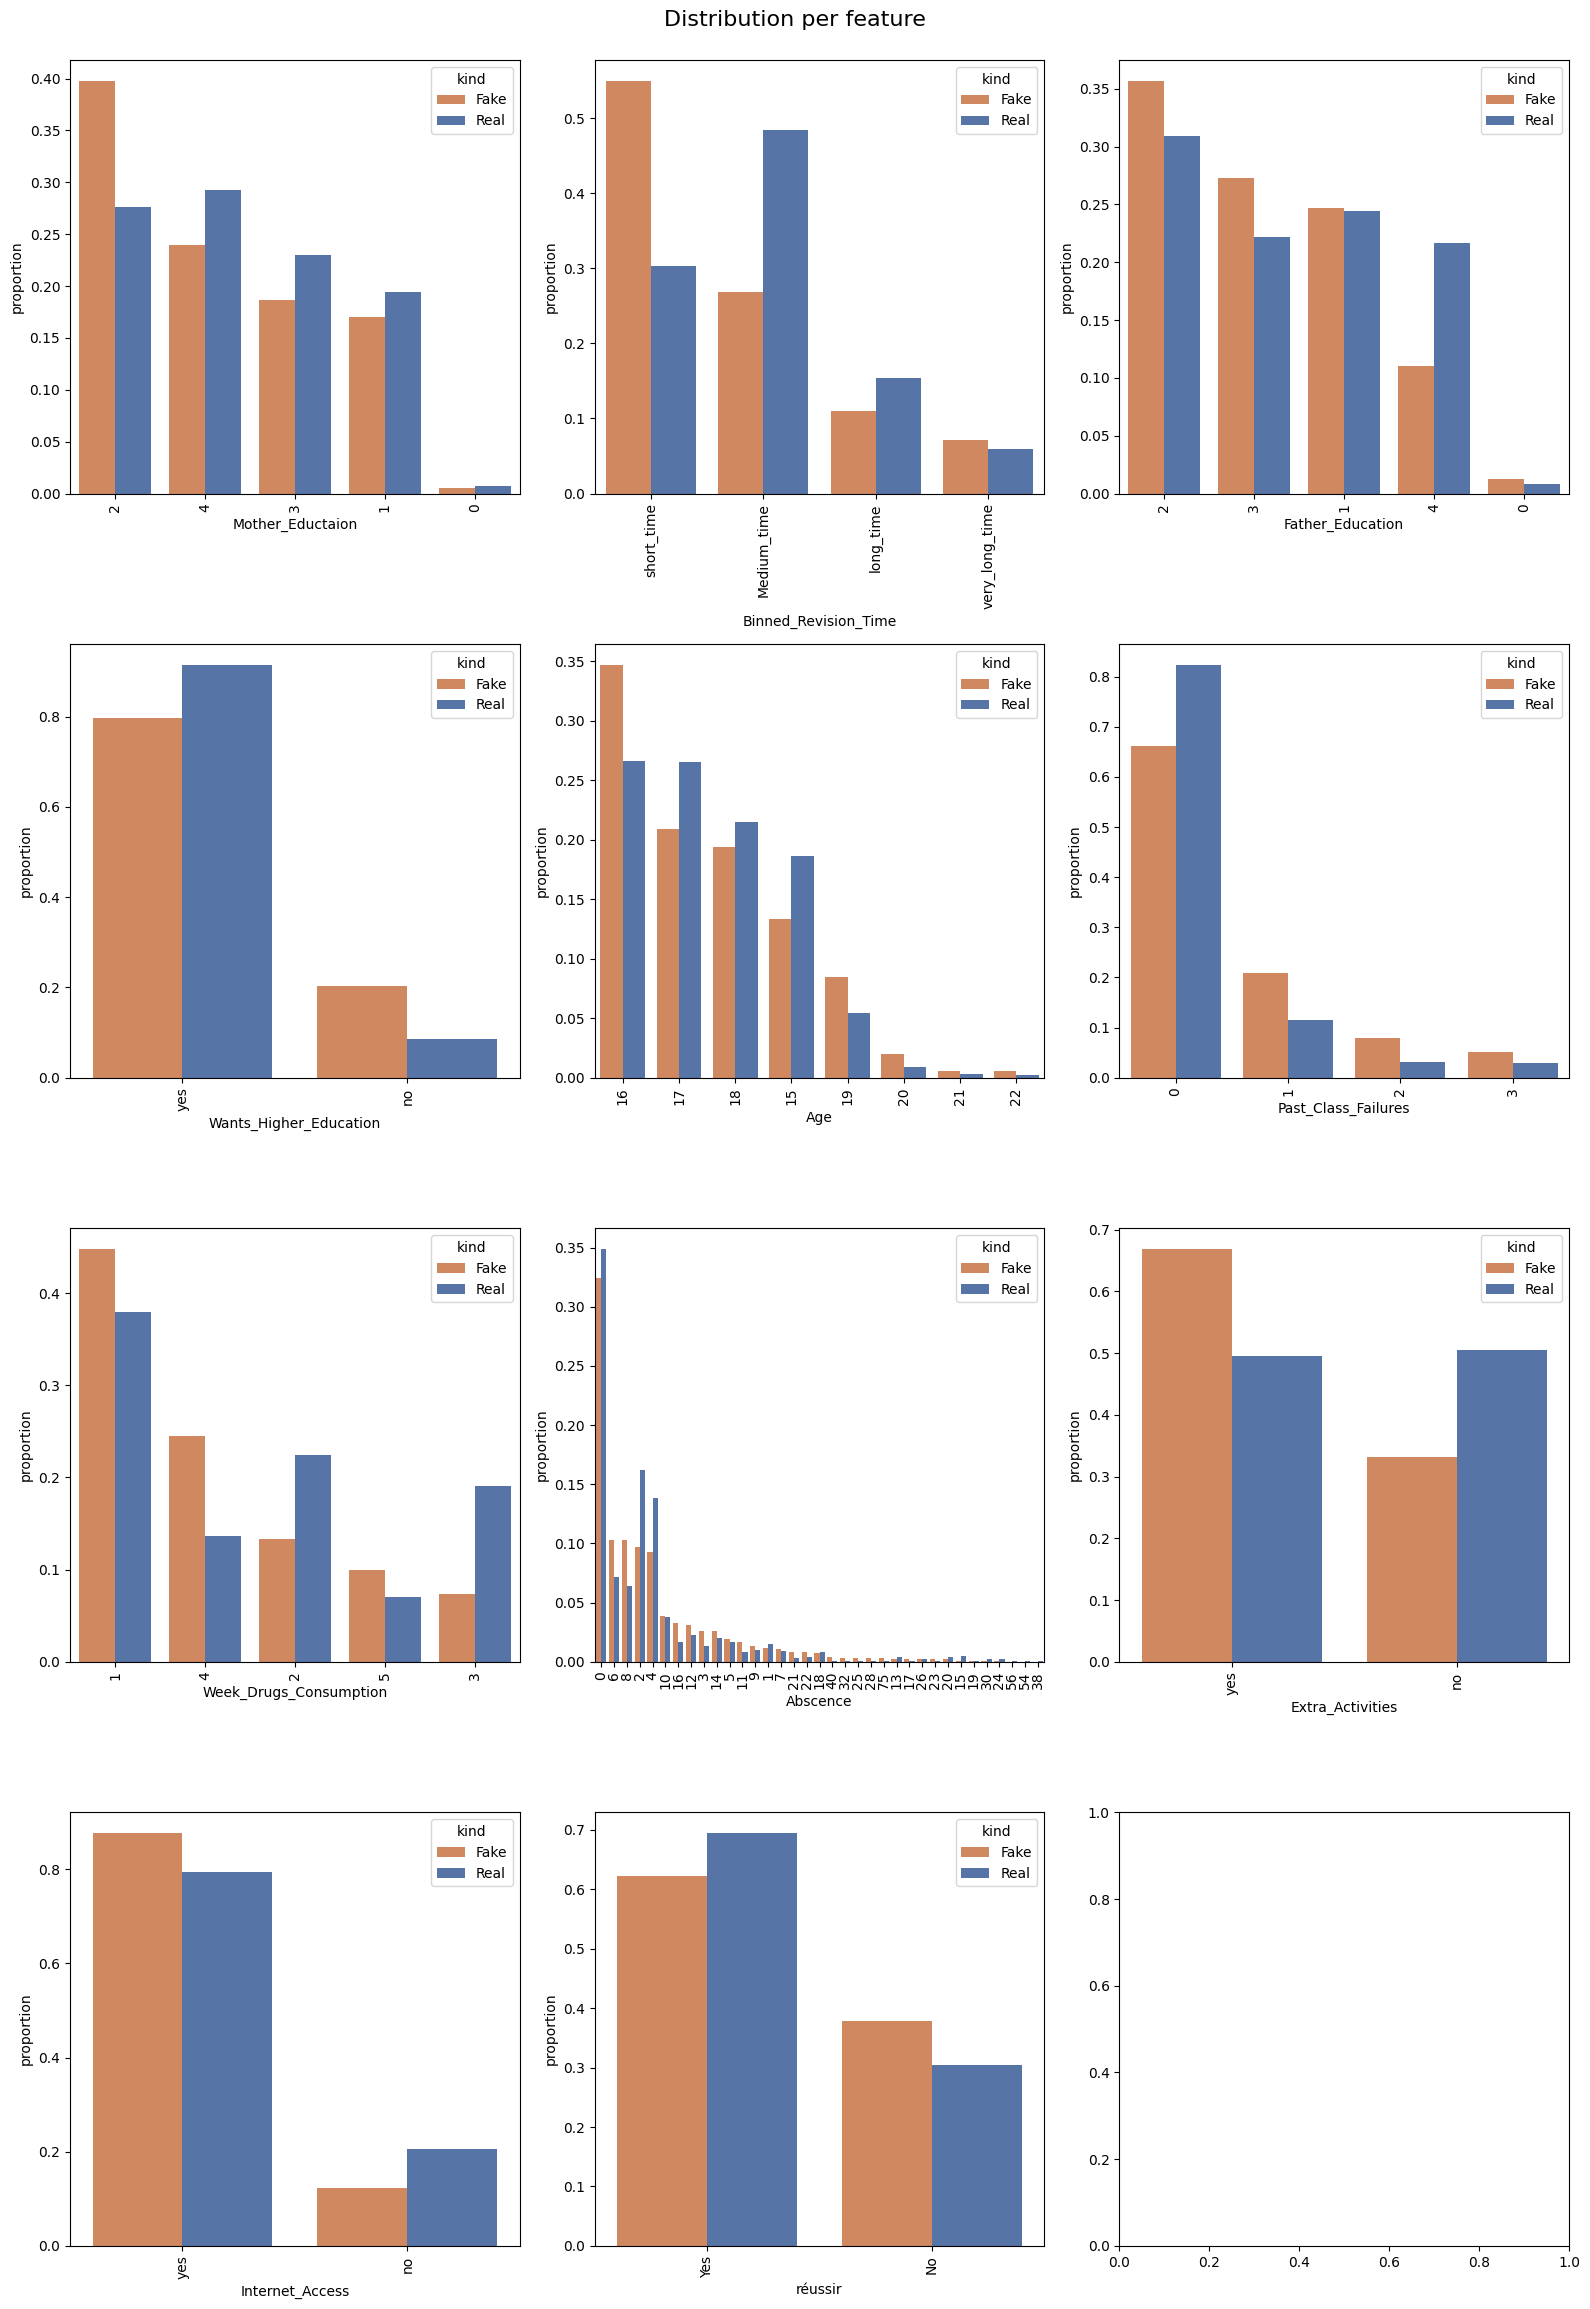

In [53]:
print(df2.shape,samples1.shape)
table_evaluator = TableEvaluator_cat(df2,samples1,cat_cols=categorical_features1)
table_evaluator.visual_evaluation()

In [85]:
samples1.to_csv(r'D:\PFE_PROJECT\artifacts\data_g_2.csv')

Data 3 : Generation 

In [86]:
df_3=df.drop(labels=["Final_grade","réussir"],axis=1)
df_3.head()

,Mother_Eductaion,Binned_Revision_Time,Father_Education,Wants_Higher_Education,Age,Past_Class_Failures,Week_Drugs_Consumption,Abscence,Extra_Activities,Internet_Access,General_Average
0,4,Medium_time,4,yes,18,0,1,6,no,no,5.666667
1,1,Medium_time,1,yes,17,0,1,4,no,yes,5.333333
2,1,Medium_time,1,yes,15,3,3,10,no,yes,8.333333
3,4,long_time,2,yes,15,0,1,2,yes,yes,14.666667
4,3,Medium_time,3,yes,16,0,2,4,no,no,8.666667


In [46]:
categorical_features2= ['Mother_Eductaion','Binned_Revision_Time','Father_Education','Wants_Higher_Education','Age','Past_Class_Failures',
       'Week_Drugs_Consumption', 'Abscence', 'Extra_Activities',
       'Internet_Access']

In [47]:
ctgan.fit(df_3,categorical_features2,epochs=1000)

Gen. (-1.12) | Discrim. (0.10): 100%|██████████| 1000/1000 [03:06<00:00,  5.37it/s]


In [49]:
samples2 = ctgan.sample(1000)
samples2.head(50)

,Mother_Eductaion,Binned_Revision_Time,Father_Education,Wants_Higher_Education,Age,Past_Class_Failures,Week_Drugs_Consumption,Abscence,Extra_Activities,Internet_Access,General_Average
0,3,short_time,2,yes,16,0,1,0,yes,yes,9.699878
1,2,long_time,2,yes,18,0,1,2,yes,yes,14.885351
2,2,very_long_time,2,yes,15,0,3,24,no,yes,8.541671
3,0,Medium_time,2,yes,16,1,5,1,yes,yes,14.592612
4,2,Medium_time,3,yes,16,0,3,16,yes,yes,13.846155
5,4,Medium_time,4,yes,16,0,4,0,yes,yes,8.663866
6,3,very_long_time,2,yes,18,0,5,8,no,yes,13.598409
7,2,Medium_time,2,yes,18,0,1,0,yes,yes,11.285581
8,3,Medium_time,3,yes,15,0,1,2,yes,yes,12.862864
9,4,Medium_time,3,yes,15,0,1,1,yes,yes,10.287110


(1044, 11) (1000, 11)


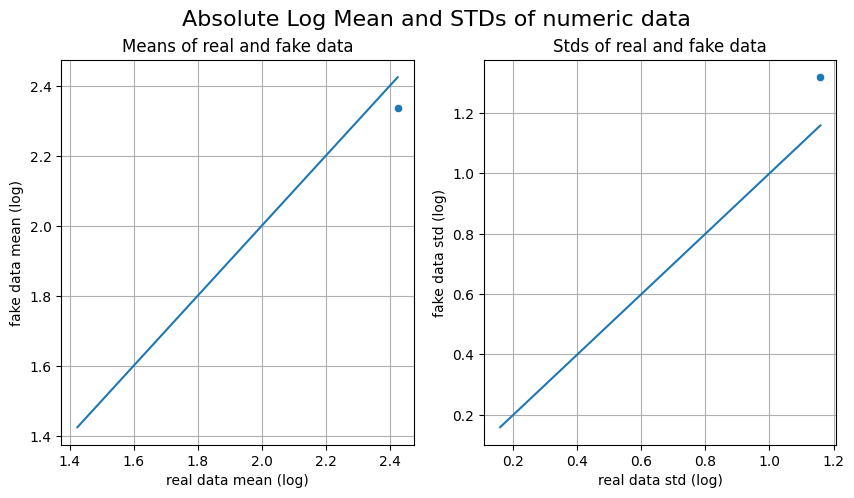

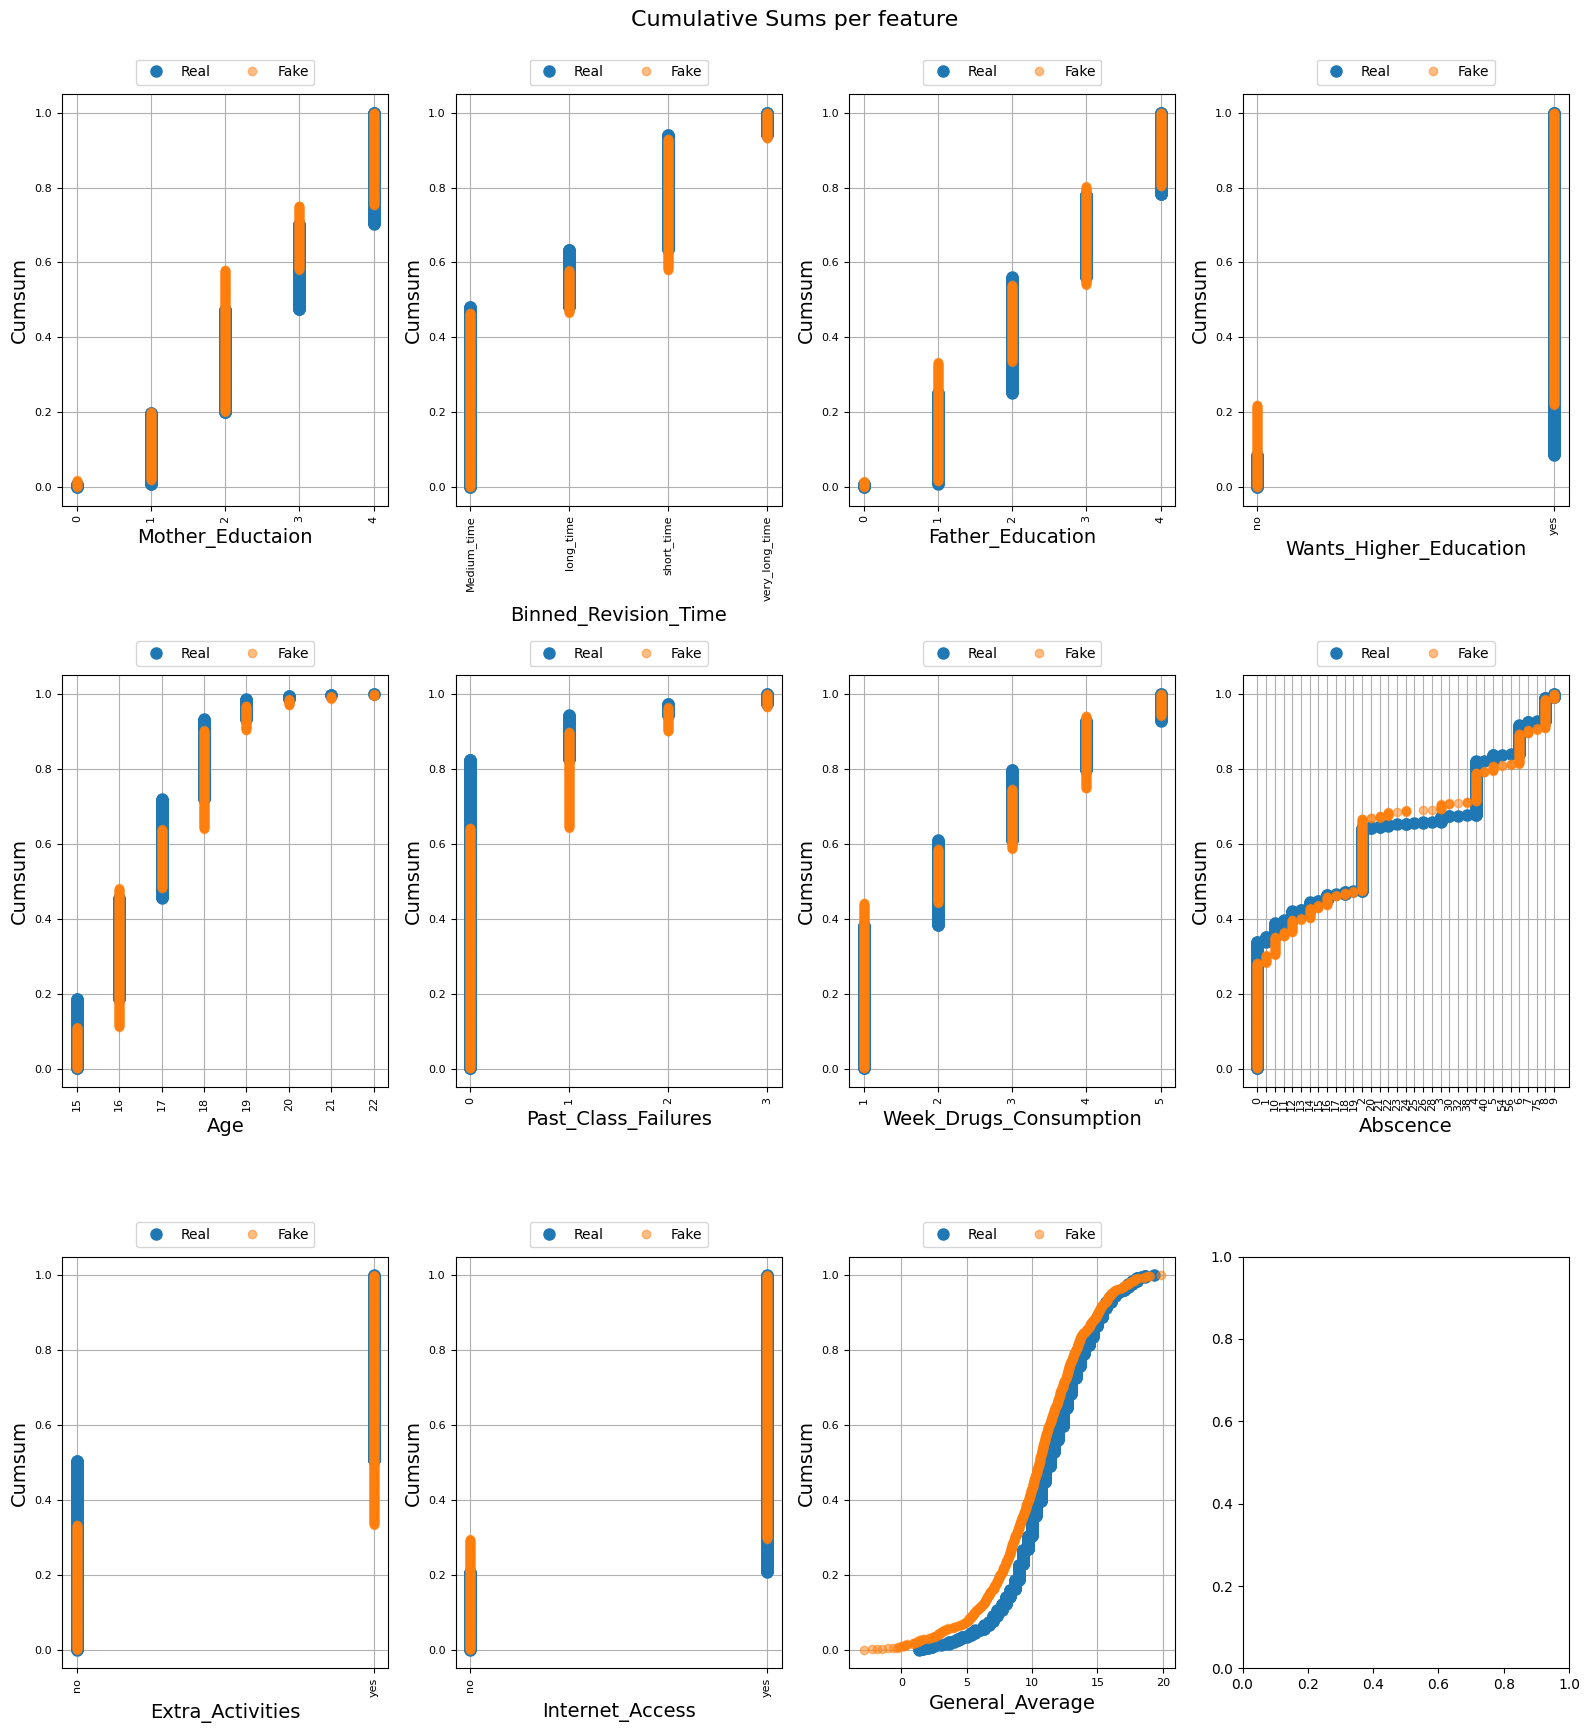

c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\envs\tensorflow_env\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
c:\Users\PC\anaconda3\en

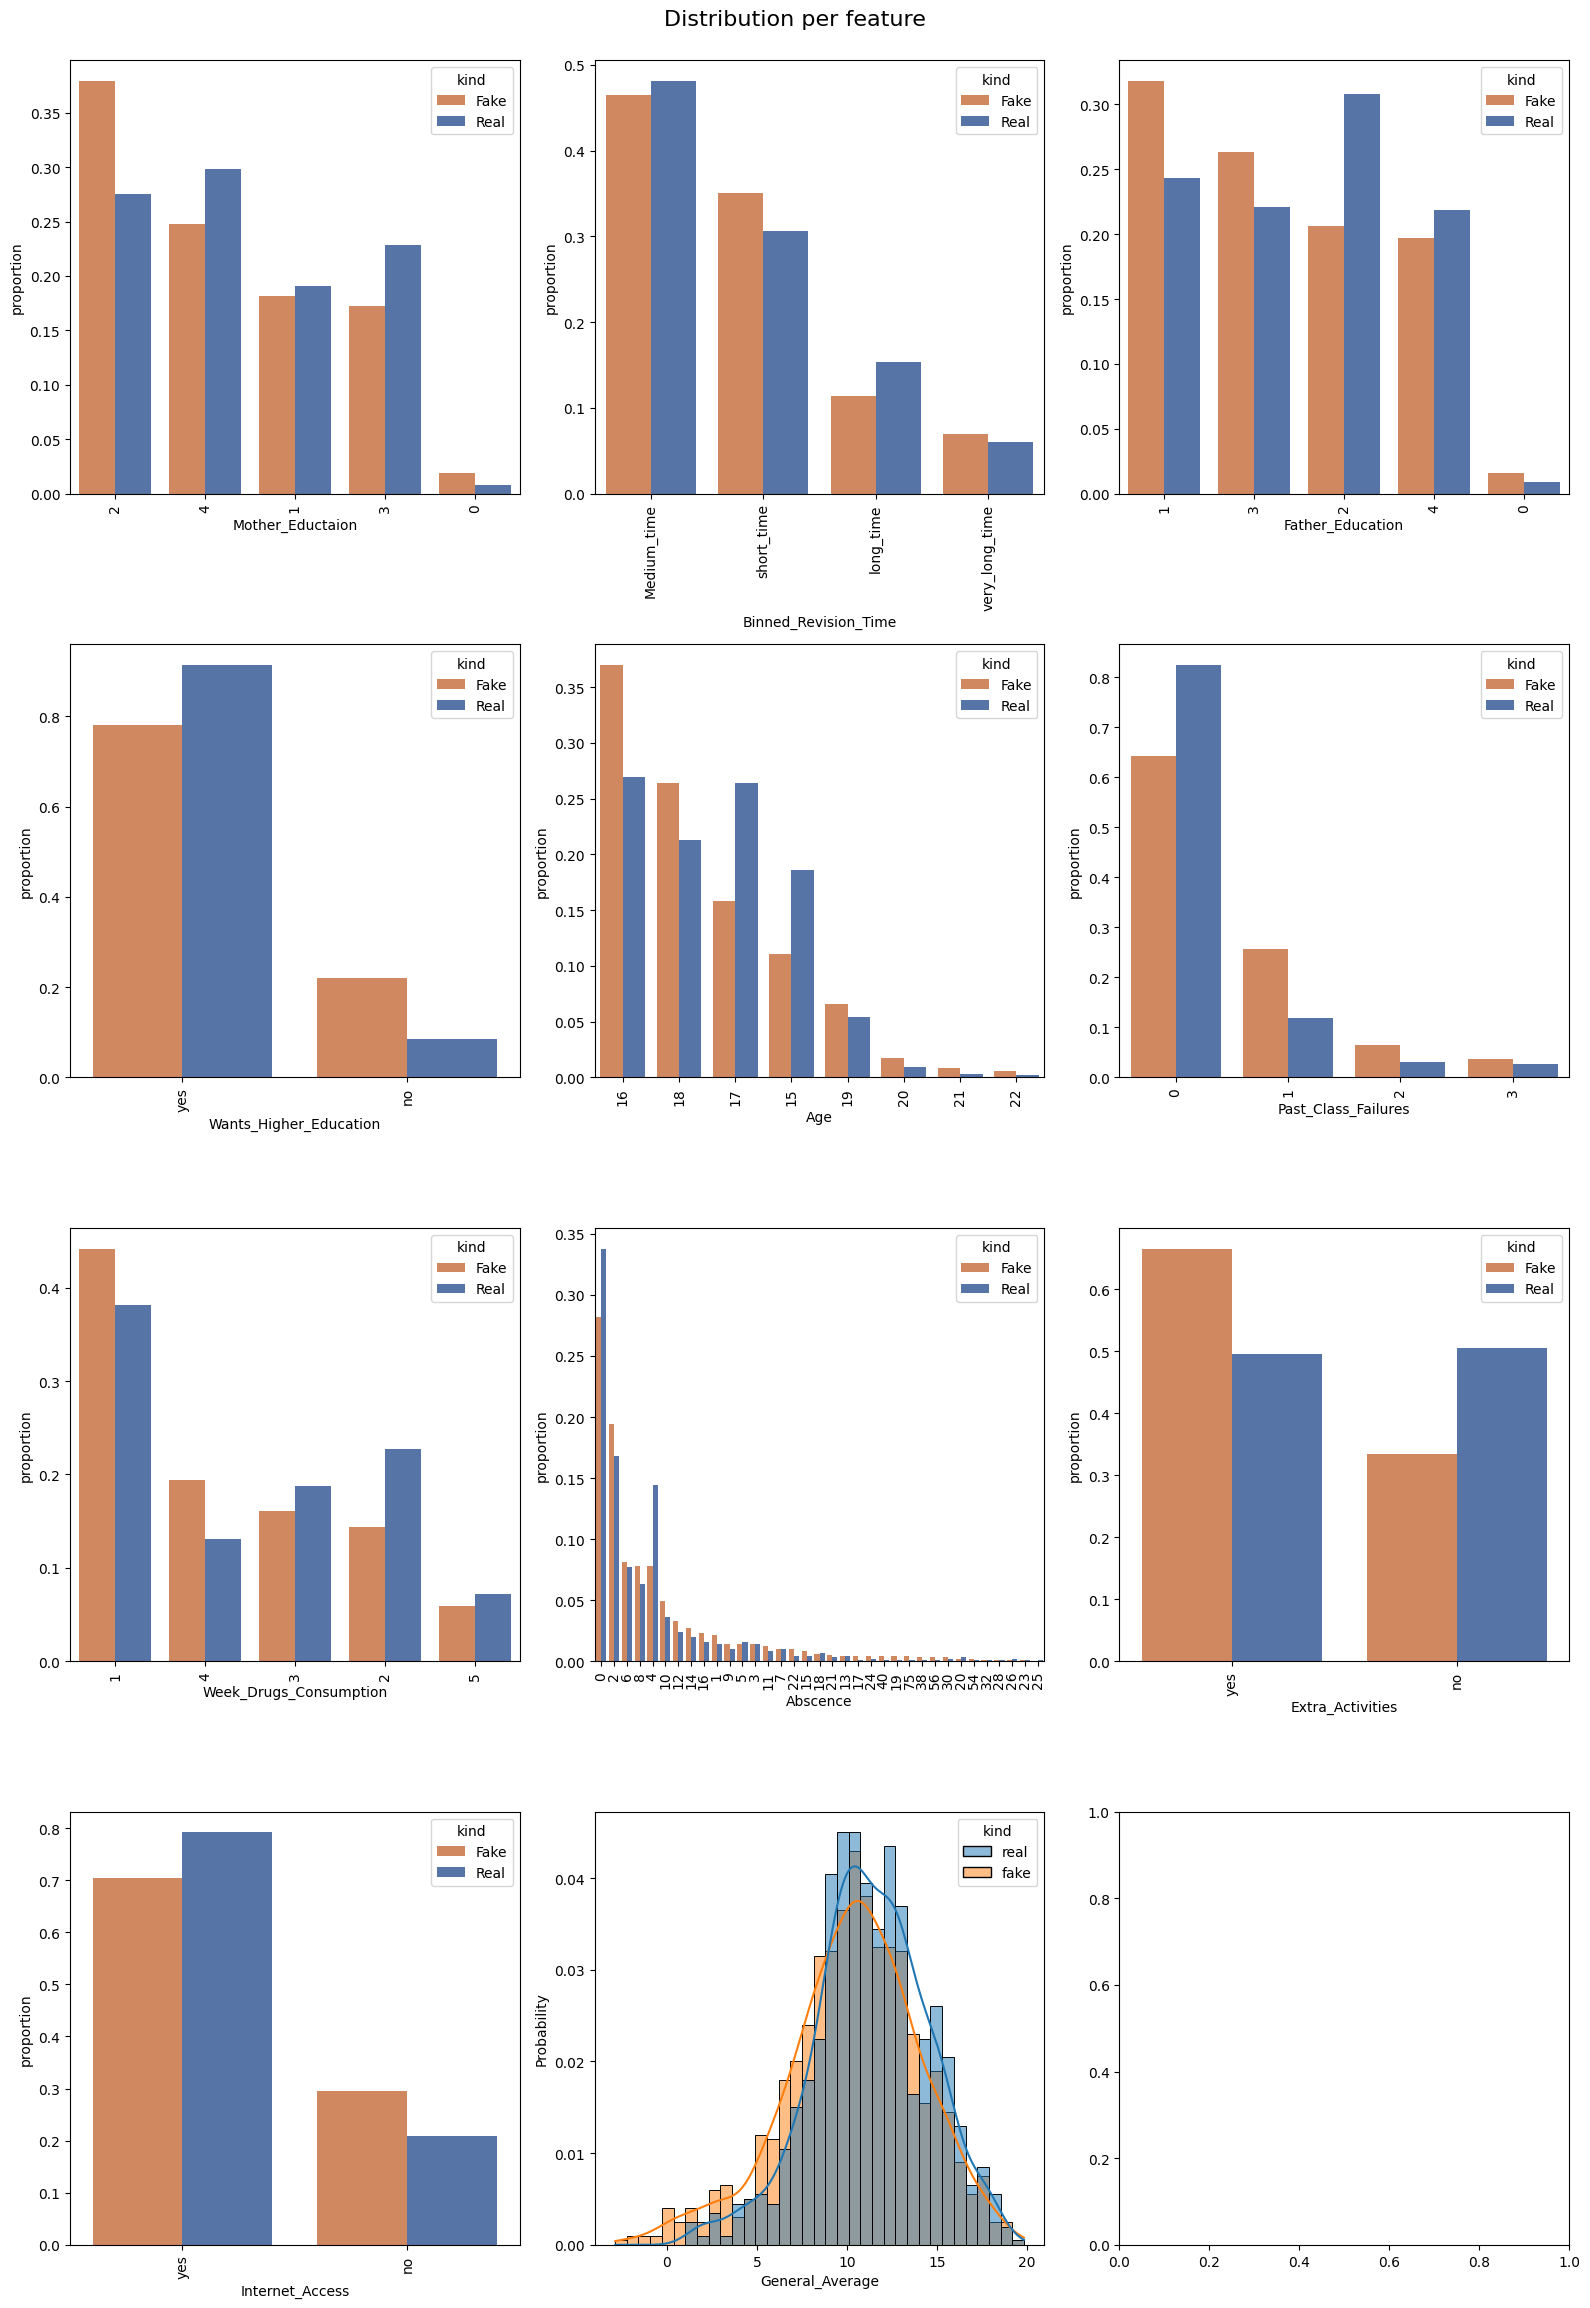

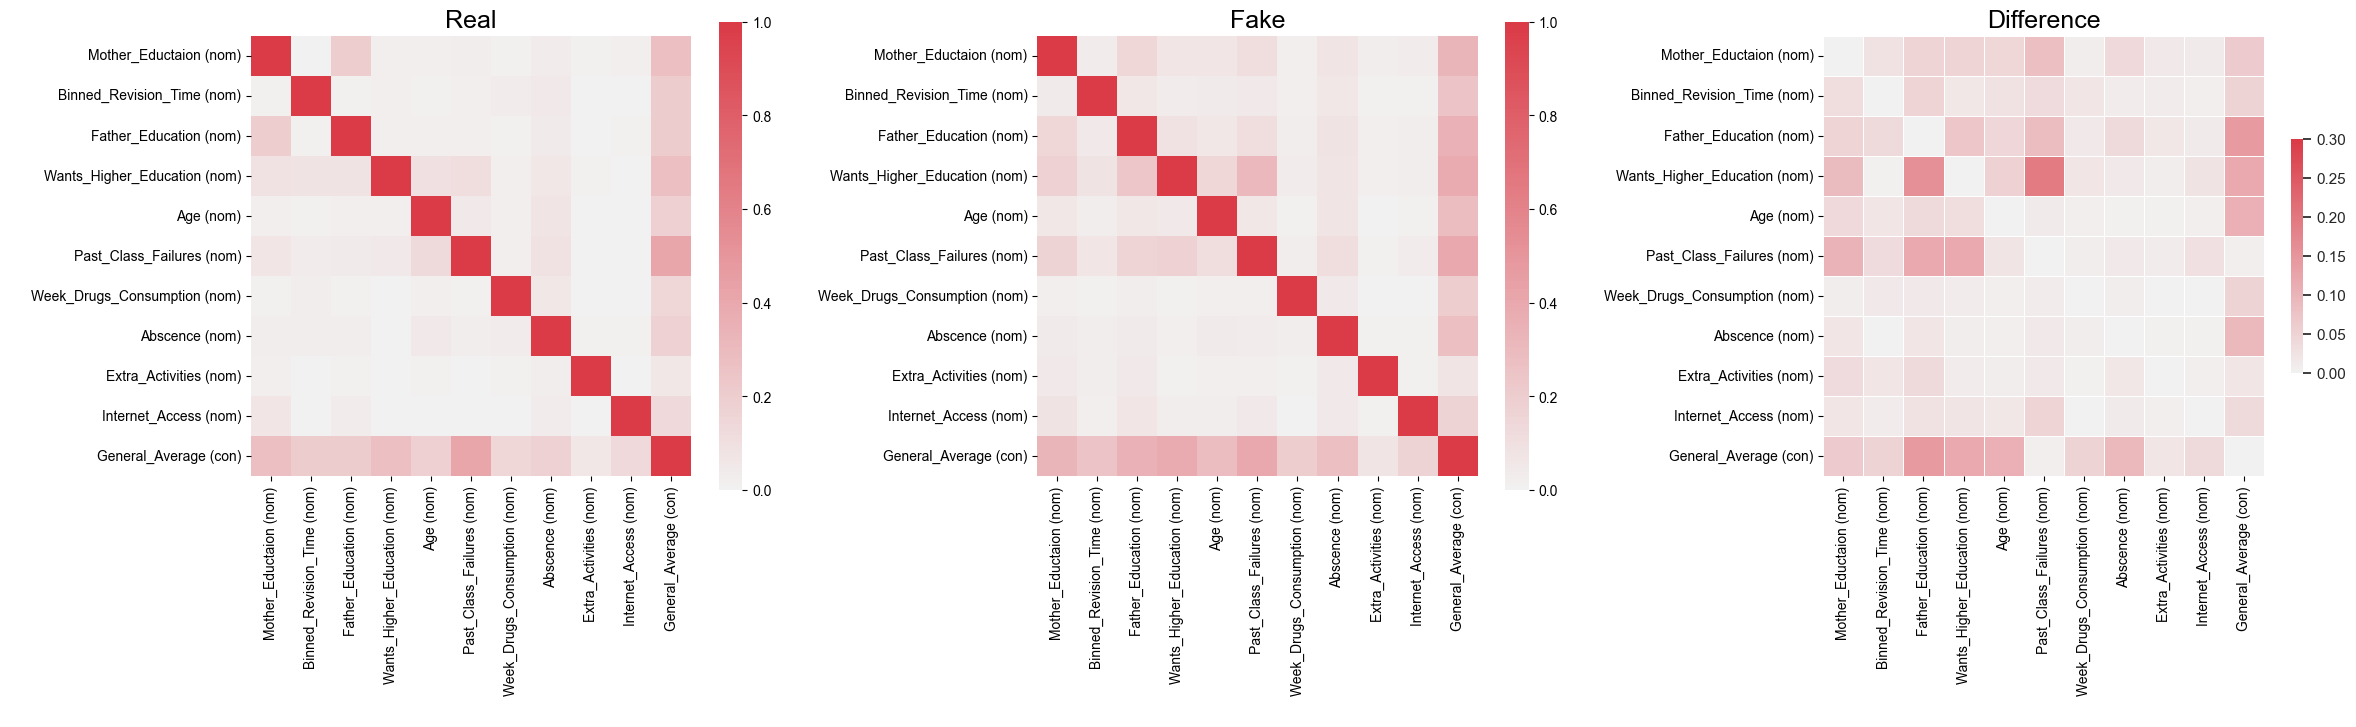

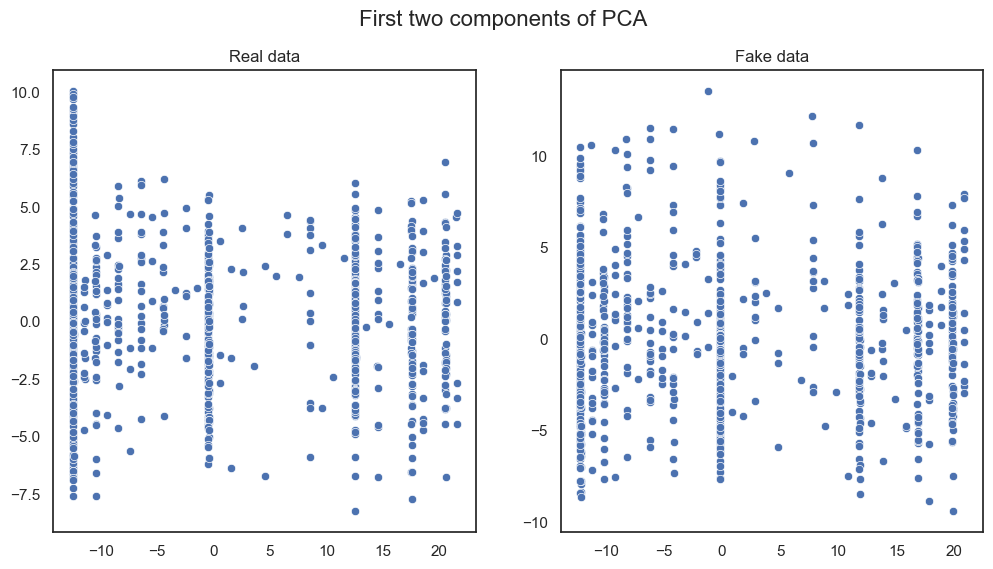

In [54]:
print(df_3.shape,samples2.shape)
table_evaluator = TableEvaluator(df_3,samples2,cat_cols=categorical_features2)
table_evaluator.visual_evaluation()